In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from lib import TrDa

In [2]:
TD = TrDa.TrainingData()
data = TD.get_training_data()
print (len(data), 
       "training sets, each consisting of",
       len(data[0]),
       "sequences")

100 training sets, each consisting of 10 sequences


Part 1 (sutton88 figure 3)

In [3]:
lambda_axis = list(np.linspace(0., 1., 11))
alpha, epsilon = .01, .001
error_axis = []
sigma_axis = []
for lamb_da in lambda_axis:
    rmse = []
    for x in range(len(data)):
        model = TrDa.TDLambda(alpha=0.01, lamb_da=lamb_da, epsilon=0.001)
        model.fit(data[x])
        rmse.append(np.sqrt(np.mean((model.ideal_w - model.calculated_w)**2)))
    error_axis.append(np.mean(rmse))

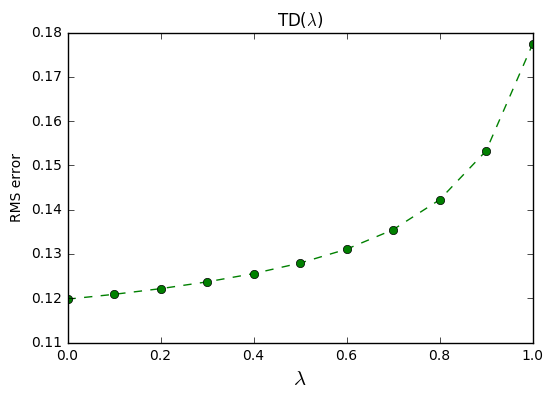

In [5]:
plt.plot(lambda_axis, error_axis, linestyle="dashed", marker="o", color="green")
plt.xlabel("$\lambda$", fontsize='15')
plt.ylabel("RMS error")
plt.title("TD($\lambda$)")
plt.show()

Part 2 (sutton88 figure 4)

In [6]:
lambda_axis = [0.0, 0.3, 0.8, 1.]
alpha_axis = list(np.linspace(0.0, 0.6, 13))
error_axis = [[0] * len(alpha_axis) for _ in range(len(lambda_axis))]
epsilon = 0.01
for i, lamb_da in enumerate(lambda_axis):
    for j, alpha in enumerate(alpha_axis):
        rmse = []
        for x in range(len(data)):
            model = TrDa.TDLambda(alpha, lamb_da, epsilon)
            model.fit1(data[x])
            rmse.append(np.sqrt(np.mean((model.ideal_w - model.calculated_w) ** 2)))
        error_axis[i][j] = np.mean(rmse) * 2

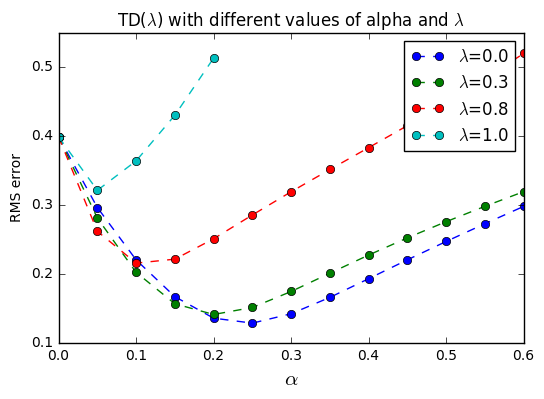

In [7]:
error_axis = np.array(error_axis).T
error_axis[error_axis > 0.7] = np.nan
plt.plot(alpha_axis, error_axis, linestyle="dashed", marker="o")
plt.xlabel(r'$\alpha$', fontsize='15')
plt.ylabel('RMS error')
plt.title("TD($\lambda$) with different values of alpha and $\lambda$")
tmp = []
for l in lambda_axis:
    tmp.append('$\lambda$=' + str(l))
plt.legend(tmp)
plt.show()

Part 3 (sutton88 figure 5)

In [4]:
lambda_axis = list(np.linspace(0.0, 1.0, 11))
alpha_axis = list(np.linspace(0.0, 0.6, 13))
epsilon, best_alpha = 0.01, [None] * len(lambda_axis)
for i, lamb_da in enumerate(lambda_axis):
    min_error = float('inf')
    for j, alpha in enumerate(alpha_axis):
        rmse = []
        for x in range(len(data)):
            model = TrDa.TDLambda(alpha, lamb_da, epsilon)
            model.fit1(data[x])
            rmse.append(np.sqrt(np.mean((model.ideal_w - model.calculated_w) ** 2)))
        if np.mean(rmse) < min_error:
            min_error = np.mean(rmse)
            best_alpha[i] = alpha

In [9]:
error_axis = []
for i in range(len(lambda_axis)):
    rmse = []
    for x in range(len(data)):
        model = TrDa.TDLambda(best_alpha[i], lambda_axis[i], epsilon)
        model.fit1(data[x])
        rmse.append(np.sqrt(np.mean((model.ideal_w - model.calculated_w) ** 2)))
    error_axis.append(np.mean(rmse))

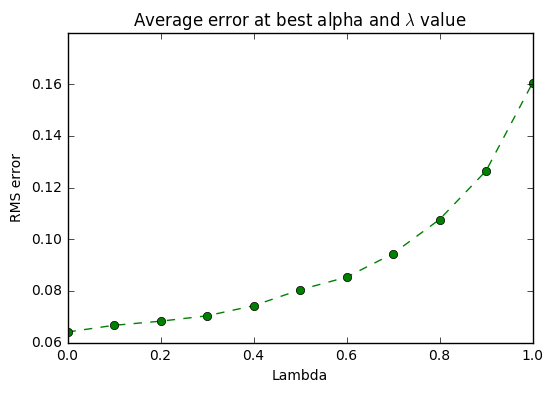

In [10]:
plt.plot(lambda_axis, error_axis, linestyle="dashed", marker="o", color="green")
plt.xlabel("Lambda")
plt.ylabel("RMS error")
plt.title("Average error at best alpha and $\lambda$ value")
plt.show()